In [2]:
#import ipdb
MFC = {}

def hash_fft_coeff(e):    
    if e in MFC:
        return MFC[e]
    else:
        return 1

def amplify(array_data):
    N = array_data.shape[0]
    result = np.zeros(N)
    yf = np.fft.fft(array_data)
    dt = 1. / 1024
    xf = np.linspace(0.0, 1.0/(2.0 * dt), N / 2)
    podgonion = np.hstack((np.repeat(0.75, N/2), np.ones(N/2)))
    result = np.fft.ifft(np.asarray([yf[i]*podgonion[i] for i in range(N)]))
    return np.int32(result)
    
    
    

    for i, e in enumerate(f_d):
        result[i] = hash_fft_coeff(e)
    
    return result

In [104]:
import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

CHUNK = 1024
FORMAT = pa.paInt32
CHANNELS = 1
RATE = 44100

# print(CHUNK / RATE)

papa = pa.PyAudio()

stream = papa.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, output=True, frames_per_buffer=CHUNK)

print("* recording")

try:
    while True:
            data = stream.read(CHUNK)
            array_data = np.fromstring(data, np.int32)

#             amplified_signal = amplify(array_data)

            result = -0.3 * array_data

            stream.write(result.astype(np.int32).tobytes())
except KeyboardInterrupt:
    print("* done recording")
    stream.close()

* recording
* done recording


In [57]:
g =  -1 * np.arange(0, 1, 0.01)

In [23]:
g.shape

(100,)

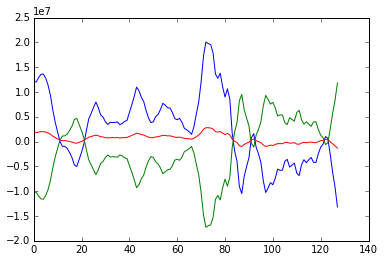

In [12]:
plt.plot(array_data)
plt.plot(result)
plt.plot(result + array_data)

In [13]:
# i = np.arange(1, 10240 / 2)
# g1 = np.sin(2 * np.pi * 5 * i / 1024)
# g2 = np.sin(2 * np.pi * 15 * i / 1024)
# plt.plot(g1)
# plt.plot(g2)
# plt.plot(g1 + g2)

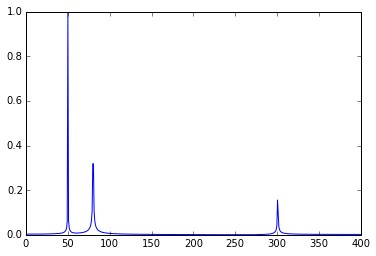

In [20]:
N = 1024
dt = 1./800
x = np.linspace(0.0, N*dt, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 0.2*np.sin(300.0 * 2.0*np.pi*x)
freq = np.fft.fftfreq(y.shape[-1], d=dt)
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

In [21]:
import pyaudio
import wave
import time
import numpy as np
CHUNK_SIZE = 5
FORMAT = pyaudio.paInt16
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=1, rate=RATE,
input=True, output=True,
frames_per_buffer=CHUNK_SIZE)
print(stream.get_input_latency(), stream.get_output_latency())
p.terminate()

0.026235827664399095 0.015600907029478459


* recording
18153407.0591


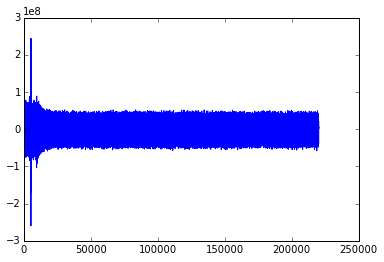

In [18]:
import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

CHUNK = 1024
FORMAT = pa.paInt32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5

# print(CHUNK / RATE)

papa = pa.PyAudio()

stream = papa.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

print("* recording")

array_data = np.array([])

try:
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
            data = stream.read(CHUNK)
            array_data = np.hstack((array_data, np.fromstring(data, np.int32)))
except KeyboardInterrupt:
    print("* done recording")
    stream.close()
    
plt.plot(array_data)
print(np.mean(np.abs(array_data[int(array_data.shape[0] * 0.1):])))

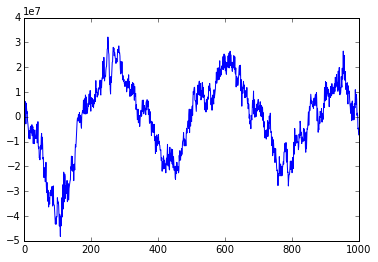

In [14]:
plt.plot(array_data[int(array_data.shape[0] * 0.1):1000+int(array_data.shape[0] * 0.1)])

In [13]:
print(np.mean(np.abs(array_data[int(array_data.shape[0] * 0.1):])))

12214948.3787


In [106]:
stream = papa.open(format=FORMAT, channels=CHANNELS, rate=RATE, output=True, frames_per_buffer=CHUNK)

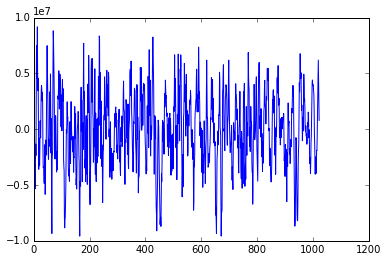

In [105]:
plt.plot(array_data)

In [112]:
stream.write(array_data)

In [110]:
array_data.shape[0] / CHUNK

1.0